In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Earth:
    mu = 398600.4  # Gravitational parameter in [km^3/s^2]
    R = 6378.14  # Radius in [km]
    J2 = 0.00108263  # J2

In [3]:
e = Earth()  # Create Earth object

In [4]:
def calculate_prefactor(a, ecc):
    n = np.sqrt(e.mu / np.power(a, 3))  # Calculate mean motion in [°/s]
    return -3 * n * e.J2 * np.power(e.R, 2) / (2 * np.power(a, 2) * np.power(1 - np.power(ecc, 2), 2))

def rotation_nodal_line(i, h, ecc):  # Calculate dOmega / dt
    i = i * np.pi / 180  # Convert inclination to [°]
    ran = calculate_prefactor(e.R + h, ecc) * np.cos(i)  # Calculate dOmega / dt
    return ran * (180 / np.pi) * 86400  # Convert to [°/d]

def rotation_apsidal_line(i, a, ecc):  # Calculate domega / dt
    i = i * np.pi / 180  # Convert inclination to [°]
    rp = calculate_prefactor(a, ecc) * (5/2 * np.power(np.sin(i), 2) - 2)  # Calculate domega / dt
    return rp * (180 / np.pi) * 86400  # Convert to [°/d]

In [5]:
def plot_rot_nodal_line(inc, alt, ecc):
    fig, ax = plt.subplots()
    for j in range(0, 5):
        ax.plot(inc, rotation_nodal_line(inc, alt[j], ecc[j]), '-', label='h = {} km'.format(int(alt[j])))
    ax.legend()

def plot_rot_apsidal_line(inc, sma, h, ecc):
    fig, ax = plt.subplots()
    for j in range(0, 5):
        ax.plot(inc, rotation_apsidal_line(inc, sma[j], ecc[j]), '-', label='ha = {} km'.format(int(h[j])))
    ax.legend()

In [6]:
h_list = [200.0, 500.0, 1000.0, 2500.0, 5000.0]  # List of altitudes in [km]
hp = 200  # Pericenter altitude for apsidal rotation in [km]
rp = e.R + hp  # Pericenter radius for apsidal rotation in [km]
ha_list = [200.0, 500.0, 1000.0, 2500.0, 5000.0]  # List of apocenters for rotation of apsidal line in [km]
ecc0_list = [0.0] * 5  # List of eccentricities for rotation of nodal line
ecc_list = [0.0] * 5  # List of eccentricities for rotation od nodal line
sma_list = [0.0] * 5  # List of semi-major axes for rotation od nodal line
for j in range(0, 5):
    sma_list[j] = (rp + (e.R + ha_list[j])) / 2
    ecc_list[j] = 1 - rp / sma_list[j]

inc_range = np.arange(0, 180, 1)  # Range of inclinations in [°]

In [7]:
plt.rcParams["figure.figsize"] = (12,8)

# Plot Rotation of the Nodal Line (Ascending Node)

\begin{equation*}
    \dot\Omega = -\frac{3nJ_2R^2}{2a^2(1-e^2)^2}\cos i
\end{equation*}
with the mean motion
\begin{equation*}
n = \sqrt{\frac{\mu}{a^3}}
\end{equation*}
Note: The plot below is for circular orbits with an altitude of $h$.

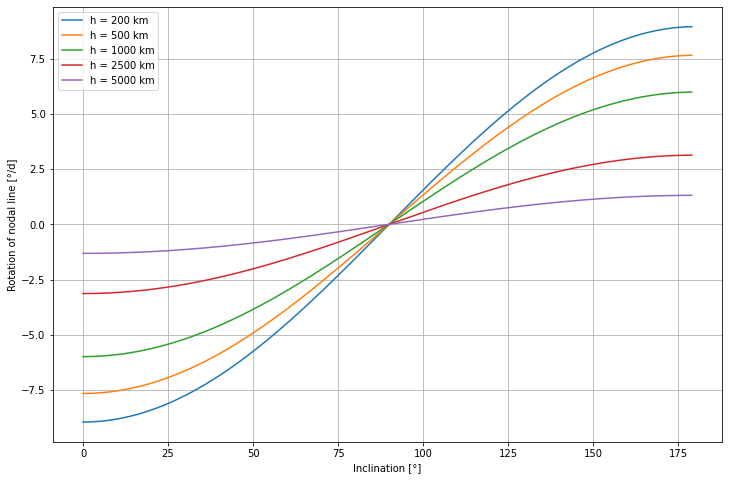

In [8]:
plot_rot_nodal_line(inc_range, h_list, ecc0_list)
plt.grid()
plt.xlabel("Inclination [°]")
plt.ylabel("Rotation of nodal line [°/d]")
plt.show()

# Plot the Rotation of the Apsidal Line (Pericenter)

\begin{equation*}
    \dot\omega = -\frac{3nJ_2R^2}{2a^2(1-e^2)^2}\left(\frac{5}{2}\sin^2 i -2\right)
\end{equation*}

\begin{align*}
    r_p &= R_E+h_p\\
    r_a &= R_E+h_a\\
    a &= \frac{r_p+r_a}{2}\\
    r_p &= a(1-e) \quad\Leftrightarrow\quad e = 1 - \frac{r_p}{a}
\end{align*}

Note: The plot below is for orbits with a pericenter altitude of $h_p = 200\,\mathrm{km}$ and an apocenter altitude of $h_a$.

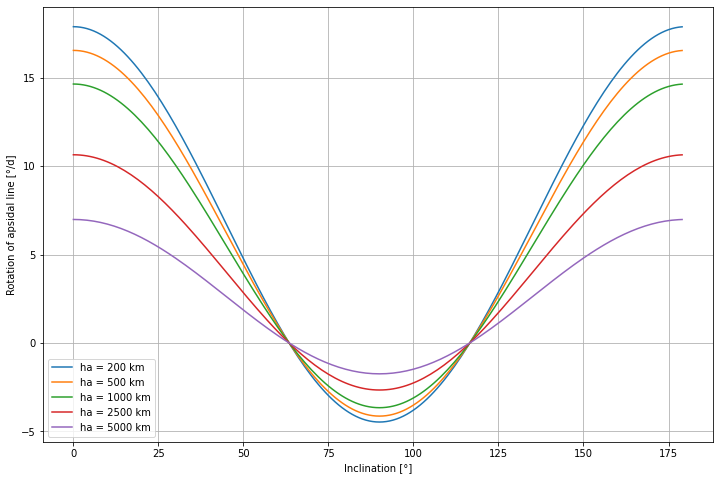

In [9]:
plot_rot_apsidal_line(inc_range, sma_list, ha_list, ecc_list)
plt.grid()
plt.xlabel("Inclination [°]")
plt.ylabel("Rotation of apsidal line [°/d]")
plt.show()